In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

STYLE = "#ffffff"

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [218]:
void_dim = 48
void = np.zeros((void_dim, void_dim, void_dim))
element_grid_min = 35
element_grid_max = 45
step = 1
column_height = random.randrange(element_grid_min, element_grid_max, step)
element = np.ones(column_height).reshape(column_height,1)
x = np.arange(start=1, stop=49, step=9)
y = np.arange(start=1, stop=49, step=9)
z_base = np.zeros((6,))
z_top = z_base + column_height

In [219]:
grid_coor_base = np.array(np.meshgrid(x, y, z_base)).T[0]

In [220]:
grid_coor_top = np.array(np.meshgrid(x, y, z_top)).T[0]

In [223]:
grid_coor = np.concatenate((grid_coor_base, grid_coor_top), axis = 2).astype(int)

In [228]:
void = np.zeros((void_dim, void_dim, void_dim))

for column_row in grid_coor:
    for column in column_row:
        void[column[0]:column[3]+1, column[1]:column[4]+1, column[2]:column[5]] = element.reshape((column_height,))

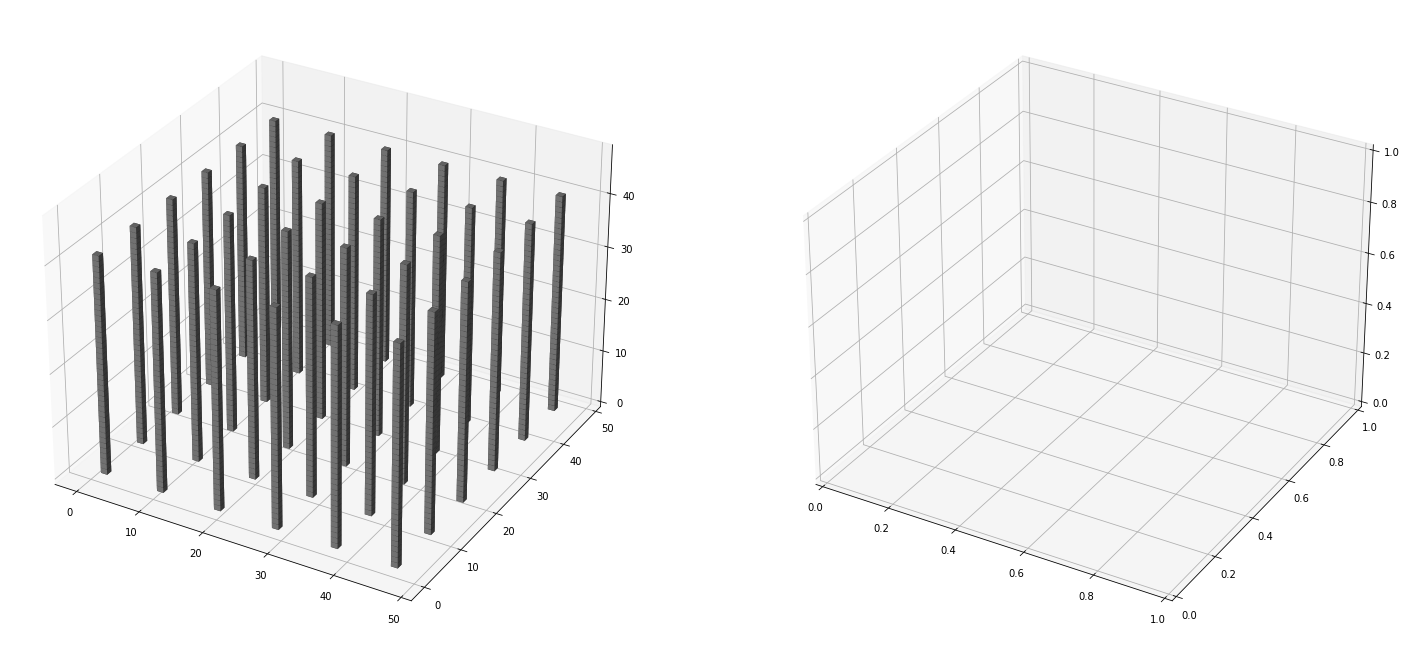

In [229]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(25, 25), facecolor = (STYLE), subplot_kw=dict(projection="3d"))
axes = axes.ravel() # flats
for index in range(1):
    axes[index].voxels(void, facecolors="gray", edgecolors="k", linewidth=0.05)

In [230]:
class Sculptor():
    
    def __init__(self, void_dim,
                 n_edge_elements,
                 n_plane_elements,
                 n_volume_elements,
                 color_edges,
                 color_planes,
                 color_volumes,
                 element_edge_min,
                 element_edge_max,
                 element_grid_min,
                 element_grid_max,
                 element_plane_min,
                 element_plane_max,
                 element_volume_min,
                 element_volume_max,
                 step,
                 verbose):
        
        self.void = np.zeros((void_dim, void_dim, void_dim))
        self.color_void = np.empty(self.void.shape, dtype=object)
        self.colors = np.empty(self.void.shape, dtype=object)
        
        self.color_edges = color_edges
        self.color_planes = color_planes
        self.color_volumes = color_volumes
        
        self.n_edge_elements = n_edge_elements
        self.n_plane_elements = n_plane_elements
        self.n_volume_elements = n_volume_elements
        self.style = "#ffffff"
        
        self.element_edge_min= element_edge_min
        self.element_edge_max = element_edge_max
        self.element_grid_min= element_grid_min
        self.element_grid_max = element_grid_max
        self.element_plane_min = element_plane_min
        self.element_plane_max = element_plane_max
        self.element_volume_min = element_volume_min
        self.element_volume_max = element_volume_max
        self.step = step
        
        self.verbose = verbose
        
        
    def return_axis(self): # CAN I JUST HAVE ONE????
        
        self.section = np.random.randint(low=0-1, high=self.void[0].shape[0]) # selects a section of the axis to work on
        
        self.axis_selection = np.random.randint(low=0, high=3) # decides if we are working in the X, Y or Z axis
        
        if self.axis_selection == 0:
            self.working_plane = self.void[self.section,:,:]
            self.color_parameters = self.color_void[self.section,:,:]
        elif self.axis_selection == 1:
            self.working_plane = self.void[:,self.section,:]
            self.color_parameters = self.color_void[:,self.section,:] 
        elif self.axis_selection == 2:
            self.working_plane = self.void[:,:,self.section]
            self.color_parameters = self.color_void[:,:,self.section]
        else:
            print("error")
            
        return self.working_plane, self.color_parameters # returns the selected plane for the void and the parameters array
    
    ### MAIN FUNCTIONS ###
    
    def add_edge(self): # WHAT TO DO WITH THE WORKING PLANE PARAMETER
        
        self.working_plane = self.return_axis()[0]
        self.color_parameters = self.return_axis()[1]
        # selection of the axis to work on
        
        if self.verbose == True:
            print(working_plane)
            print("###############################################################")

        #Variables
        self.edge_length = random.randrange(self.element_edge_min, self.element_edge_max, self.step) # estas variables quizas no necesiten ser self!!
        self.edge_plane = np.random.randint(low=0, high=2)

        if self.edge_plane == 0:
            self.element = np.ones(self.edge_length).reshape(self.edge_length,1)
        else:
            self.element = np.ones(self.edge_length).reshape(self.edge_length,1).T

        # creates the element to be inserted
        self.delta = np.array(self.working_plane.shape) - np.array(self.element.shape) 
        # finds the delta between the size of the void and the size of the element
        self.top_left_corner = np.array((np.random.randint(low=0, high=self.delta[0]) , np.random.randint(low=0, high=self.delta[1])))
        # finds the coordinates of the top left corner
        self.bottom_right_corner = np.array(self.top_left_corner) + np.array(self.element.shape) #- np.array([1,1]))
        # finds the coordinates of the bottom right corner
        
        self.working_plane[self.top_left_corner[0]:self.bottom_right_corner[0] , self.top_left_corner[1]:self.bottom_right_corner[1]] = self.element
        # makes the slides using the coordinates equal to the element
        
        self.color_parameters[self.top_left_corner[0]:self.bottom_right_corner[0] , self.top_left_corner[1]:self.bottom_right_corner[1]] = self.color_edges

        if self.verbose == True:
            print(self.working_plane)
            print("###############################################################")
        
        return self.void, self.color_void
    
    def add_plane(self): # WHAT TO DO WITH THE WORKING PLANE PARAMETER
        
        self.element = None
        self.section = None
        self.delta = None
        self.top_left_corner = None
        self.bottom_right_corner = None
        self.working_plane = self.return_axis()[0]
        
        if self.verbose == True:
            print(self.working_plane)
            print("###############################################################")

        #Variables
        self.element = np.ones((random.randrange(self.element_plane_min, self.element_plane_max, self.step), random.randrange(self.element_plane_min, self.element_plane_max, self.step)))
        # creates the element to be inserted
        self.delta = np.array(self.working_plane.shape) - np.array(self.element.shape) 
        # finds the delta between the size of the void and the size of the element
        self.top_left_corner = np.array((np.random.randint(low=0, high=self.delta[0]) , np.random.randint(low=0, high=self.delta[1])))
        # finds the coordinates of the top left corner
        self.bottom_right_corner = np.array(self.top_left_corner) + np.array(self.element.shape) #- np.array([1,1]))
        # finds the coordinates of the bottom right corner
        self.working_plane[self.top_left_corner[0]:self.bottom_right_corner[0] , self.top_left_corner[1]:self.bottom_right_corner[1]] = self.element
        # makes the slides using the coordinates equal to the element
        
        self.color_parameters[self.top_left_corner[0]:self.bottom_right_corner[0] , self.top_left_corner[1]:self.bottom_right_corner[1]] = self.color_planes
        
        if self.verbose == True:
            self.print_information()
            print("###############################################################")
            
        return self.void, self.color_void
    
    def add_pipe_cantilever(self): # THIS IS GOOD!!
        
        self.element = None
        self.working_plane = None
        self.delta = None
        self.top_left_corner = None
        self.bottom_right_corner = None
        self.axis_selection = np.random.randint(low=0, high=2)
        self.shape_selection = np.random.randint(low=0, high=2)
        self.depth = random.randrange(self.element_volume_min, self.element_volume_max, self.step)
        
        if self.verbose == True:
            print(self.working_plane)
            print("###############################################################")
            
        self.element = np.ones((random.randrange(self.element_volume_min, self.element_volume_max, self.step), random.randrange(self.element_volume_min, self.element_volume_max, self.step)))
        self.element = np.repeat(self.element, repeats=self.depth, axis=0).reshape((self.element.shape[0],self.element.shape[1],self.depth))

        self.element_void = np.zeros((self.element.shape[0]-2, self.element.shape[1]-2))
        self.element_void = np.repeat(self.element_void, repeats=self.depth).reshape((self.element_void.shape[0],self.element_void.shape[1],self.depth))

        # element[1:-1,1:-1,:] = element_void # elegir pasar el vacio o no como parte del volumen
        
        self.delta = np.array(self.void.shape) - np.array(self.element.shape) # ENCONTRAR LOS NUEVOS DELTAS

        corner_1 = np.array((np.random.randint(low=0, high=self.delta[0]) , np.random.randint(low=0, high=self.delta[1]), np.random.randint(low=0, high=self.delta[2])))
        corner_2 = np.array((corner_1[0] + self.element.shape[0], corner_1[1], corner_1[2]))
        corner_3 = np.array((corner_1[0], corner_1[1], corner_1[2] + self.element.shape[2]))
        corner_4 = np.array((corner_1[0] + self.element.shape[0], corner_1[1], corner_1[2] + self.element.shape[2]))
        
        corner_5 = np.array((corner_1[0], corner_1[1] + self.element.shape[1], corner_1[2]))
        corner_6 = np.array((corner_2[0], corner_2[1] + self.element.shape[1], corner_2[2]))
        corner_7 = np.array((corner_3[0], corner_3[1] + self.element.shape[1], corner_3[2]))
        corner_8 = np.array((corner_4[0], corner_4[1] + self.element.shape[1], corner_4[2]))
        
        self.color_volume = np.random.randint(0,3)
        
        # creates the floor and ceiling
        self.void[corner_3[0]:corner_8[0], corner_3[1]:corner_8[1], corner_3[2]-1] = self.element[:,:,0]
        self.color_void[corner_3[0]:corner_8[0], corner_3[1]:corner_8[1], corner_3[2]-1] = self.color_volumes[self.color_volume]
        
        self.void[corner_1[0]:corner_6[0], corner_1[1]:corner_6[1], corner_1[2]] = self.element[:,:,1]
        self.color_void[corner_1[0]:corner_6[0], corner_1[1]:corner_6[1], corner_1[2]] = self.color_volumes[self.color_volume]
        
        # creates de walls
        if self.shape_selection ==0:
            if self.axis_selection == 0:
                self.void[corner_1[0], corner_1[1]:corner_7[1], corner_1[2]:corner_7[2]] = self.element[0,:,:]
                self.color_void[corner_1[0], corner_1[1]:corner_7[1], corner_1[2]:corner_7[2]] = self.color_volumes[self.color_volume]
                
                self.void[corner_2[0]-1, corner_2[1]:corner_8[1], corner_2[2]:corner_8[2]] = self.element[1,:,:]
                self.color_void[corner_2[0]-1, corner_2[1]:corner_8[1], corner_2[2]:corner_8[2]] = self.color_volumes[self.color_volume]
            else:
                self.void[corner_5[0]:corner_8[0], corner_5[1], corner_5[2]:corner_8[2]] = self.element[:,0,:]
                self.color_void[corner_5[0]:corner_8[0], corner_5[1], corner_5[2]:corner_8[2]] = self.color_volumes[self.color_volume]
                
                self.void[corner_1[0]:corner_4[0], corner_1[1], corner_1[2]:corner_4[2]] = self.element[:,0,:]
                self.color_void[corner_1[0]:corner_4[0], corner_1[1], corner_1[2]:corner_4[2]] = self.color_volumes[self.color_volume]
                
        else:
            if self.axis_selection == 0:
                self.void[corner_1[0], corner_1[1]:corner_7[1], corner_1[2]:corner_7[2]] = self.element[0,:,:]
                self.color_void[corner_1[0], corner_1[1]:corner_7[1], corner_1[2]:corner_7[2]] = self.color_volumes[self.color_volume]
                
                self.void[corner_5[0]:corner_8[0], corner_5[1], corner_5[2]:corner_8[2]] = self.element[:,0,:]
                self.color_void[corner_5[0]:corner_8[0], corner_5[1], corner_5[2]:corner_8[2]] = self.color_volumes[self.color_volume]
            else:
                self.void[corner_2[0]-1, corner_2[1]:corner_8[1], corner_2[2]:corner_8[2]] = self.element[1,:,:]
                self.color_void[corner_2[0]-1, corner_2[1]:corner_8[1], corner_2[2]:corner_8[2]] = self.color_volumes[self.color_volume]
                
                self.void[corner_1[0]:corner_4[0], corner_1[1], corner_1[2]:corner_4[2]] = self.element[:,0,:]
                self.color_void[corner_1[0]:corner_4[0], corner_1[1], corner_1[2]:corner_4[2]] = self.color_volumes[self.color_volume]
        
        if self.verbose == True:
            self.print_information()
            print("###############################################################")
        
        
        
        return self.void
    
    def add_grill(self): # work on the grid
        self.working_plane = self.void[:,:,self.section]
        self.color_parameters = self.return_axis()[1]
        # selection of the axis to work on
        
        if self.verbose == True:
            print(working_plane)
            print("###############################################################")

        #Variables
        self.column_length = random.randrange(self.element_grid_min, self.element_grid_max, self.step) # estas variables quizas no necesiten ser self!!
        
        x = np.arange(start=1, stop=49, step=9)
        y = np.arange(start=1, stop=49, step=9)
             
        self.element = np.ones(self.edge_length).reshape(self.edge_length,1)
        
        # finds the delta between the size of the void and the size of the element
        self.grid_coor = gridnp.array(np.meshgrid(x, y)).T
        # finds the coordinates of the top left corner
        
        self.working_plane[self.top_left_corner[0]:self.bottom_right_corner[0] , self.top_left_corner[1]:self.bottom_right_corner[1]] = self.element
        # makes the slides using the coordinates equal to the element
        
        self.color_parameters[self.top_left_corner[0]:self.bottom_right_corner[0] , self.top_left_corner[1]:self.bottom_right_corner[1]] = self.color_edges

        if self.verbose == True:
            print(self.working_plane)
            print("###############################################################")
        
        return self.void, self.color_void
    
    ### ULTILS ###
    
    def print_information(self):
        print(f"void shape is: {np.array(self.void[0].shape)}")
        print(f"element shape is : {np.array(self.element.shape)}")
        print(f"the axis selection is: {self.axis_selection}")
        print(f"delta is: {self.delta}")
        print(f"section is: {self.section}")
        print(f"top left corner is: {self.top_left_corner}")
        print(f"bottom right corner is: {self.bottom_right_corner}")
        print(f"slices are: {self.top_left_corner[0]}:{self.bottom_right_corner[0]} and {self.top_left_corner[1]}:{self.bottom_right_corner[1]}")
        print("###############################################################")
    
    def plot_sections(self):
        sculpture = self.void
        fig, axes = plt.subplots(ncols=6, nrows=int(np.ceil(self.void.shape[0]/6)), figsize=(25, 25), facecolor = (self.style))
        axes = axes.ravel() # flats
        for index in range(self.void.shape[0]):
            axes[index].imshow(sculpture[index,:,:], cmap = "gray")
            
    def plot_sculpture(self):
        sculpture = self.void
        fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(25, 25), facecolor = (self.style), subplot_kw=dict(projection="3d"))
        axes = axes.ravel() # flats
        for index in range(1):
            axes[index].voxels(sculpture, facecolors=self.color_void, edgecolors="k", linewidth=0.05)
    
    ### GENERATOR ###
    
    def generative_sculpt(self):
        start = time.time()
        for edge in range(self.n_edge_elements):
            self.add_edge()
            
        for plane in range(self.n_plane_elements):
            self.add_plane()
            
        for volume in range(self.n_volume_elements):
            self.add_pipe_cantilever()
            
        print ('Time for sculptures is {} sec'.format(time.time()-start))
        
        return self.void, self.color_void

In [231]:
void_dim = 48

sculptor = Sculptor(void_dim = void_dim,
                    n_edge_elements = 6,
                    n_plane_elements = 5,
                    n_volume_elements = 4,
                    color_edges = "dimgrey",
                    color_planes = "snow",
                    color_volumes = ["greenyellow","orange","mediumpurple"], # greenyellow, chartreuse, mediumpurple, orange, crimson, turquoise, gold
                    element_edge_min= int(void_dim*0.8),
                    element_edge_max = int(void_dim*0.9),
                    element_plane_min = int(void_dim*0.4),
                    element_plane_max = int(void_dim*0.8),
                    element_volume_min = int(void_dim*0.2),
                    element_volume_max = int(void_dim*0.5),
                    step = 1,
                    verbose = False)

sculptor.generative_sculpt()

sculptor.plot_sculpture()

TypeError: __init__() missing 2 required positional arguments: 'element_grid_min' and 'element_grid_max'

In [ ]:
sculptor.plot_sections()